## **Regression Analysis**

The goal of this regression analysis is to model and predict the ride fare using relevant numerical and categorical features. This will help us understand which factors most strongly influence fare pricing.

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge

In [8]:
df = pd.read_csv("/home/mahir_uddin/Downloads/Uber dataset/Uber EDA Refined Dataset.csv")
df.head()

,timestamp,source,destination,ride_company,vehicle,distance,surge_multiplier,fare
0,2018-11-26 03:40:46,Boston University,Financial District,Lyft,Lux Black,4.46,1.75,62.5
1,2018-11-26 03:40:46,Boston University,Financial District,Lyft,Lux,4.46,1.75,47.5
2,2018-11-26 03:40:46,North Station,Fenway,Uber,WAV,3.05,1.00,10.5
3,2018-11-26 03:40:46,Boston University,Theatre District,Lyft,Lux Black XL,3.03,1.00,34.0
4,2018-11-26 03:40:46,Northeastern University,Beacon Hill,Lyft,Lyft,2.43,1.00,10.5


In [3]:
df.columns

Index(['timestamp', 'source', 'destination', 'ride_company', 'vehicle',
       'distance', 'surge_multiplier', 'fare'],
      dtype='object')

In [9]:
# Drop timestamp as this doesn't contribute to prediction
df = df.drop(columns=['timestamp'])

## **Simple Linear Regression**

In [5]:
# Target variable
y_s = df['fare']

# Feature matrix
X_s = pd.DataFrame(df["distance"])

In [6]:
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_s, y_s, test_size=0.2, random_state=42)

In [7]:
model_s = LinearRegression()
model_s.fit(X_train_s, y_train_s)

LinearRegression()

In [8]:
y_pred_s = model_s.predict(X_test_s)
print("R² Score:", r2_score(y_test_s, y_pred_s))
print("RMSE:", np.sqrt(mean_squared_error(y_test_s, y_pred_s)))
print("MAE:", mean_absolute_error(y_test_s, y_pred_s))

R² Score: 0.1166805692018047
RMSE: 8.760156929339706
MAE: 7.091675594793165


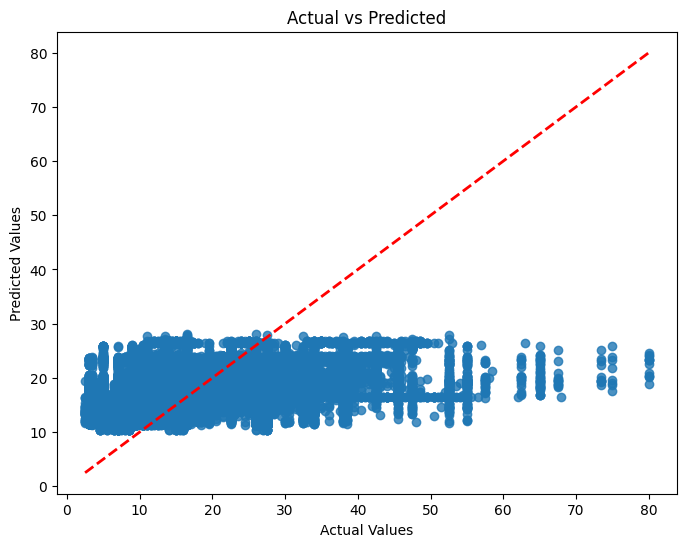

In [9]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test_s, y_pred_s, alpha=0.8)
plt.plot([y_test_s.min(), y_test_s.max()], [y_test_s.min(), y_test_s.max()], 'r--', lw=2)  # diagonal line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.show()

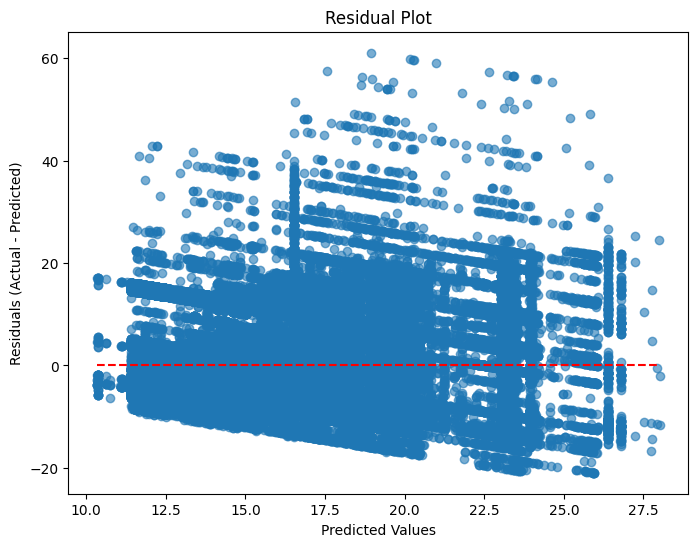

In [10]:
residuals = y_test_s - y_pred_s

plt.figure(figsize=(8, 6))
plt.scatter(y_pred_s, residuals, alpha=0.6)
plt.hlines(0, xmin=y_pred_s.min(), xmax=y_pred_s.max(), colors='r', linestyles='dashed')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot')
plt.show()

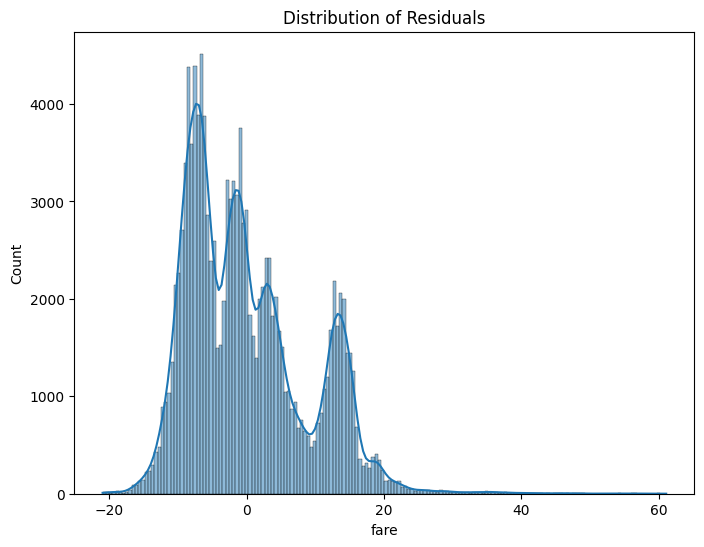

In [11]:
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.show()

In [12]:
# Intercept (β₀)
intercept_s = model_s.intercept_

# Coefficients (β₁, β₂, ..., βn)
coefficients_s = model_s.coef_

# Feature names (assuming X is a DataFrame)
features_s = X_train_s.columns

# Display the regression equation
equation_s = f"fare = {intercept_s:.3f}"
for coef, feat in zip(coefficients_s, features_s):
    equation_s += f" + ({coef:.3f} × {feat})"

print("Regression Equation:")
print(equation_s)


Regression Equation:
fare = 10.266 + (2.898 × distance)


### 📉 **Simple Linear Regression Results and Interpretation**

**Model**: Simple Linear Regression  
**Feature Used**: `distance` only  
**Target Variable**: `fare`

---

**Evaluation Metrics:**
- **R² Score**: 0.117
- **RMSE**: 8.76
- **MAE**: 7.09

---

#### 📌 **Interpretation:**

- The **R² score of 0.117** indicates that the model explains only **11.7%** of the variance in the fare, which is quite low.
- Both **RMSE (8.76)** and **MAE (7.09)** are relatively high, considering the average fare. This means the model is not accurately predicting the fare in many cases.
- The **residual plot and actual vs. predicted plot** clearly show that the model underpredicts fares, especially for rides with high fare values.

---

#### 📊 **Insight:**

This poor performance suggests that `distance` alone is not sufficient to determine the fare.  
Other important features such as:

- `vehicle` type (e.g., luxury vs shared rides),
- `source` and `destination` locations,
- `ride_company` (Uber or Lyft),
- and possibly `surge_multiplier`

have significant influence on the fare.

---

#### ✅ **Conclusion:**

Simple linear regression with only one feature (`distance`) fails to capture the complexity of fare determination.  
A more sophisticated model with multiple features and possibly non-linear relationships is required for better accuracy.


## **Multiple Linear Regression**

In [10]:
# Target variable
y_m = df['fare']

# Feature matrix
X_m = df.drop(columns=['fare'])

# One-hot encode categorical features
X_m = pd.get_dummies(X_m, columns=['source', 'destination', 'ride_company', 'vehicle'], drop_first=True)

In [5]:
X_m.head()

,timestamp,distance,surge_multiplier,source_Beacon Hill,source_Boston University,source_Fenway,source_Financial District,source_Haymarket Square,source_North End,source_North Station,...,vehicle_Lux,vehicle_Lux Black,vehicle_Lux Black XL,vehicle_Lyft,vehicle_Lyft XL,vehicle_Shared,vehicle_UberPool,vehicle_UberX,vehicle_UberXL,vehicle_WAV
0,2018-11-26 03:40:46,4.46,1.75,False,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,2018-11-26 03:40:46,4.46,1.75,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2,2018-11-26 03:40:46,3.05,1.00,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
3,2018-11-26 03:40:46,3.03,1.00,False,True,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,2018-11-26 03:40:46,2.43,1.00,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False


In [11]:
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_m, y_m, test_size=0.2, random_state=42)

In [15]:
model_m = LinearRegression()
model_m.fit(X_train_m, y_train_m)

LinearRegression()

In [16]:
y_pred_m = model_m.predict(X_test_m)
print("R² Score:", r2_score(y_test_m, y_pred_m))
print("RMSE:", np.sqrt(mean_squared_error(y_test_m, y_pred_m)))
print("MAE:", mean_absolute_error(y_test_m, y_pred_m))

R² Score: 0.9213523767381009
RMSE: 2.6139410891961985
MAE: 1.8029356328988493


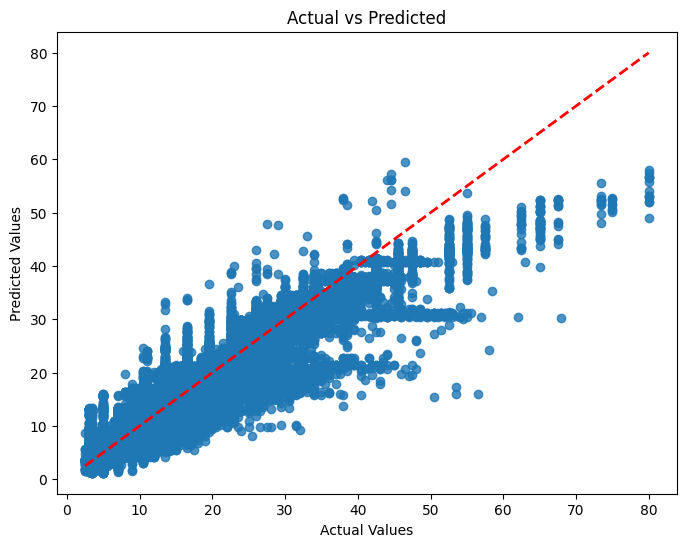

In [19]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test_m, y_pred_m, alpha=0.8)
plt.plot([y_test_m.min(), y_test_m.max()], [y_test_m.min(), y_test_m.max()], 'r--', lw=2)  # diagonal line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.show()


It's seen that, model is underpredicting the fare slightly. The predicted fares are mostly below the actual fare.

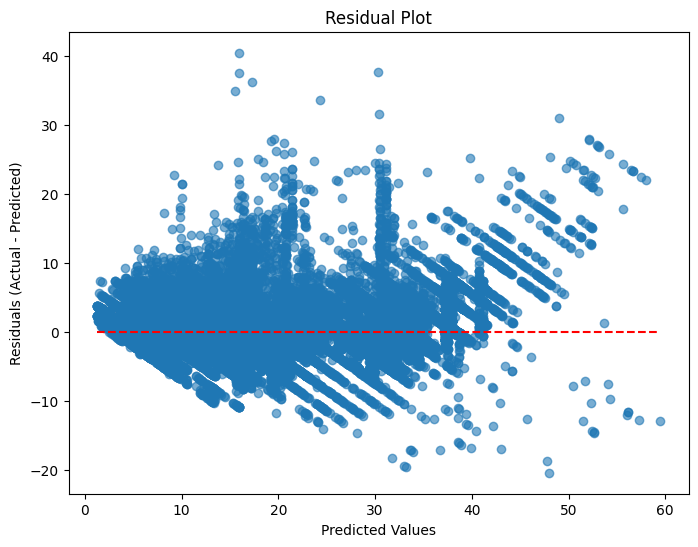

In [20]:
residuals_m = y_test_m - y_pred_m

plt.figure(figsize=(8, 6))
plt.scatter(y_pred_m, residuals_m, alpha=0.6)
plt.hlines(0, xmin=y_pred_m.min(), xmax=y_pred_m.max(), colors='r', linestyles='dashed')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot')
plt.show()

Majority of residual point is above the zero line, indicating unestimation of the actual fare.

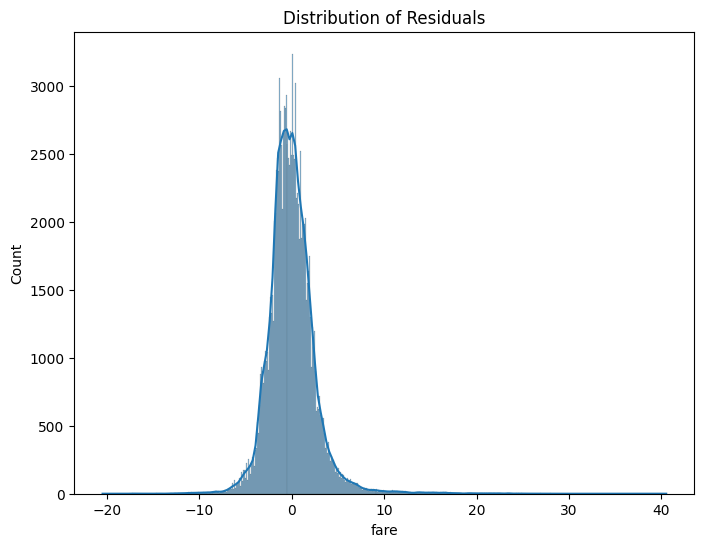

In [21]:
plt.figure(figsize=(8, 6))
sns.histplot(residuals_m, kde=True)
plt.title('Distribution of Residuals')
plt.show()

In [22]:
# Intercept (β₀)
intercept_m = model_m.intercept_

# Coefficients (β₁, β₂, ..., βn)
coefficients_m = model_m.coef_

# Feature names (assuming X is a DataFrame)
features_m = X_train_m.columns

# Display the regression equation
equation_m = f"fare = {intercept_m:.3f}"
for coef, feat in zip(coefficients_m, features_m):
    equation_m += f" + ({coef:.3f} × {feat})"

print("Regression Equation:")
print(equation_m)

Regression Equation:
fare = -7.154 + (2.948 × distance) + (18.029 × surge_multiplier) + (-0.621 × source_Beacon Hill) + (-0.459 × source_Boston University) + (-0.247 × source_Fenway) + (0.425 × source_Financial District) + (0.202 × source_Haymarket Square) + (0.372 × source_North End) + (-0.236 × source_North Station) + (-0.437 × source_Northeastern University) + (0.007 × source_South Station) + (0.209 × source_Theatre District) + (-0.242 × source_West End) + (-0.305 × destination_Beacon Hill) + (-0.040 × destination_Boston University) + (-0.327 × destination_Fenway) + (0.504 × destination_Financial District) + (0.217 × destination_Haymarket Square) + (0.118 × destination_North End) + (0.193 × destination_North Station) + (0.392 × destination_Northeastern University) + (0.202 × destination_South Station) + (0.250 × destination_Theatre District) + (-0.043 × destination_West End) + (3.313 × ride_company_Uber) + (9.766 × vehicle_Black SUV) + (-0.227 × vehicle_Lux) + (5.054 × vehicle_Lux B

### 📈 Multiple Linear Regression (MLE) – Results and Interpretation

**Model**: Multiple Linear Regression  
**Features Used**: `distance`, `surge_multiplier`, and encoded categorical variables (source, destination, ride_company, vehicle)  
**Target Variable**: `fare`

---

**Evaluation Metrics:**
- **R² Score**: **0.921**
- **RMSE**: **2.61**
- **MAE**: **1.80**

---

#### 📌 Interpretation:

- A **R² score of 0.921** means that the model is able to explain 92.1% of the variance in the fare, which is a significant improvement over the simple linear model.
- **RMSE (2.61)** and **MAE (1.80)** are both low, indicating that the model is making reasonably accurate predictions on average.
- However, a deeper look into the plots reveals some issues that suggest the model could still be improved:

---

#### 📊 Error and Residual Analysis:

- The **Actual vs Predicted** plot shows that many predictions fall below the red diagonal line, indicating a tendency to underpredict fares, especially at higher values.
- The **residual plot** has more points above the zero line, suggesting a systematic underestimation of fare values.
- The **residual distribution (histogram)** is right-skewed, with values stretching to +40, while negative residuals extend only to -20. This confirms that the model frequently underpredicts large fares, possibly due to factors it cannot model linearly.

---

#### ✅ Conclusion:

While the multiple linear regression model performs much better than the simple model, it still struggles with higher fare predictions. This behavior indicates that non-linear relationships or feature interactions may be present, which the linear model fails to capture.

To further improve prediction accuracy and better model the complexities of the data, more advanced techniques like regularization (Ridge/Lasso) or non-linear models (e.g., Polynomial Regression) should be considered — which we explore in the following sections.


## **Linear Regression with L2 Regularization (Ridge) and Feature Scaling**

In [23]:
# Target variable
y_r = df['fare']

# Feature matrix
X_r = df.drop(columns=['fare'])

# One-hot encode categorical features
X_r = pd.get_dummies(X_r, columns=['source', 'destination', 'ride_company', 'vehicle'], drop_first=True)

In [24]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('model', Ridge(alpha=1.0))  # alpha is regularization strength
])

In [25]:
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_r, y_r, test_size=0.2, random_state=42)

In [26]:
pipe.fit(X_train_r, y_train_r)
y_pred_r = pipe.predict(X_test_r)

In [27]:
print("R² Score:", r2_score(y_test_r, y_pred_r))
print("RMSE:", np.sqrt(mean_squared_error(y_test_r, y_pred_r)))
print("MAE:", mean_absolute_error(y_test_r, y_pred_r))

R² Score: 0.9213523807577518
RMSE: 2.613941022397417
MAE: 1.80293331066351
